### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('C:/Users/akapoor/Documents/Berkeley/Week5/data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
#missing values or problematic data
total_missing_percentage = data.isnull().sum()*100/len(data)
total_missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': total_missing_percentage})
total_missing_value_df[total_missing_value_df.missing_count != 0]

,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


3. Decide what to do about your missing data -- drop, replace, other...

There are too many values missing for Car Feature, for that reason we would drop that column. But for features like Bar, CoffeeHouse, Carryaway, RestaurentLessThan20, Restaurent20To50 we can fill in the missing data.

In [7]:
#drop car feature
data=data.drop('car', axis=1)

In [8]:
# Filling missing values with most common value of that feature
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

In [9]:
#check some rows missing values are filled with most commonly used 
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [10]:
data.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


In [11]:
data.drop(['toCoupon_GEQ5min', 'direction_same'], axis=1, inplace=True)
#rename column from Y to coupon_accepted for better readability
data.rename(columns = {'Y':'coupon_accepted'}, inplace = True)

4. What proportion of the total observations chose to accept the coupon? 



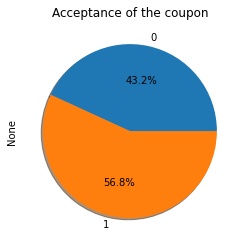

In [17]:
plot = data.groupby("coupon_accepted").size().plot.pie(title="Acceptance of the coupon", legend=False, \
                   autopct='%1.1f%%',  \
                   shadow=True, startangle=0)

5. Use a bar plot to visualize the `coupon` column.

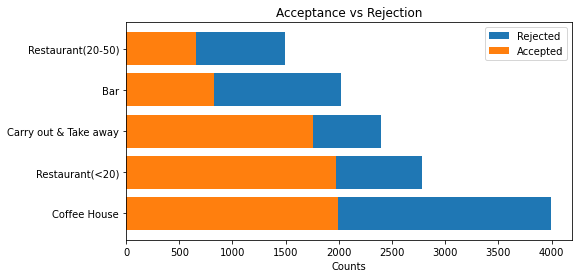

In [18]:
#Discrete coupon feature
df_DC = pd.DataFrame(sorted(list(data['coupon'].unique())),columns=['coupon'])
df_DC['Total_Count'] = list(data.groupby('coupon').coupon_accepted.count())
df_DC['Accepted'] = list(data[data.coupon_accepted==1].groupby('coupon').coupon_accepted.count())
df_DC['Rejected'] = list(data[data.coupon_accepted==0].groupby('coupon').coupon_accepted.count())
df_DC['%Accepted'] = round(df_DC['Accepted']/df_DC['Total_Count']*100,3)
df_DC['%Rejected'] = round(df_DC['Rejected']/df_DC['Total_Count']*100,3)
df_DC = df_DC.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(8, 4))
plt.barh(df_DC['coupon'],df_DC['Total_Count'])
plt.barh(df_DC['coupon'],df_DC['Accepted'])
plt.legend(labels=['Rejected','Accepted'])
plt.xlabel('Counts')
plt.title('Acceptance vs Rejection')
plt.show()

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

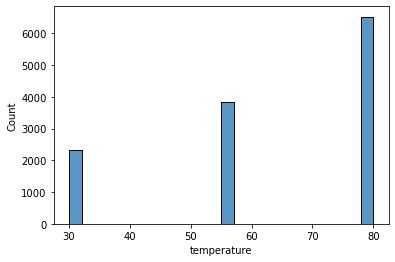

In [19]:
sns.histplot(data=data, x="temperature")

<AxesSubplot:xlabel='temperature', ylabel='Count'>

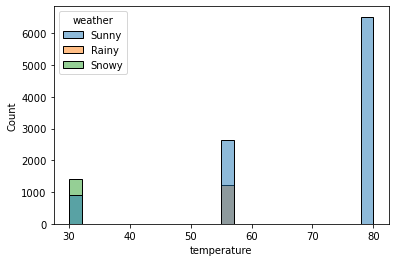

In [20]:
sns.histplot(data=data, x="temperature", hue="weather")

# Based on above it shows that coupons are accepted during sunny weather. 

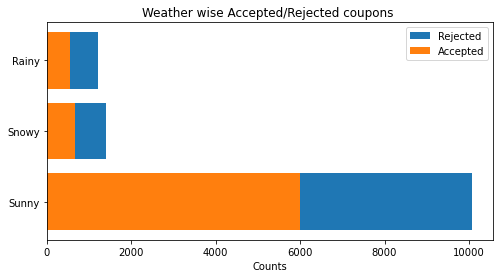

In [21]:
df_weather = pd.DataFrame(sorted(list(data['weather'].unique())),columns=['weather'])
df_weather['Total_Count'] = list(data.groupby('weather').coupon_accepted.count())
df_weather['Accepted'] = list(data[data.coupon_accepted==1].groupby('weather').coupon_accepted.count())
df_weather['Rejected'] = list(data[data.coupon_accepted==0].groupby('weather').coupon_accepted.count())
df_weather['%Accepted'] = round(df_weather['Accepted']/df_weather['Total_Count']*100,3)
df_weather['%Rejected'] = round(df_weather['Rejected']/df_weather['Total_Count']*100,3)
df_weather = df_weather.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(8, 4))
plt.barh(df_weather['weather'],df_weather['Total_Count'])
plt.barh(df_weather['weather'],df_weather['Accepted'])
plt.legend(labels=['Rejected','Accepted'])
plt.xlabel('Counts')
plt.title('Weather wise Accepted/Rejected coupons ')
plt.show()

In [22]:
df_weather

,weather,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,Sunny,10069,5989,4080,59.480,40.520
1,Snowy,1405,661,744,47.046,52.954
0,Rainy,1210,560,650,46.281,53.719


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
df_Bar=data[['Bar', 'coupon_accepted']]
df_Bar

,Bar,coupon_accepted
0,never,1
1,never,0
2,never,1
3,never,0
4,never,0
...,...,...
12679,never,1
12680,never,1
12681,never,0
12682,never,0


2. What proportion of bar coupons were accepted?


In [24]:
df_Bar_grouped = pd.DataFrame(sorted(list(df_Bar['Bar'].unique())),columns=['Bar'])
df_Bar_grouped['Total_Count'] = list(df_Bar.groupby('Bar').coupon_accepted.count())
df_Bar_grouped['Accepted'] = list(df_Bar[df_Bar.coupon_accepted==1].groupby('Bar').coupon_accepted.count())
df_Bar_grouped['Rejected'] = list(df_Bar[df_Bar.coupon_accepted==0].groupby('Bar').coupon_accepted.count())
df_Bar_grouped     

,Bar,Total_Count,Accepted,Rejected
0,1~3,2473,1538,935
1,4~8,1076,686,390
2,gt8,349,201,148
3,less1,3482,1963,1519
4,never,5304,2822,2482


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


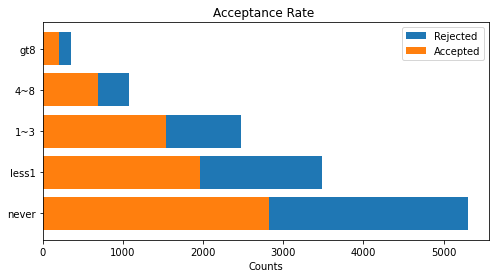

In [26]:
df_Bar_grouped['%Accepted'] = round(df_Bar_grouped['Accepted']/df_Bar_grouped['Total_Count']*100,3)
df_Bar_grouped['%Rejected'] = round(df_Bar_grouped['Rejected']/df_Bar_grouped['Total_Count']*100,3)
df_Bar_grouped = df_Bar_grouped.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(8, 4))
plt.barh(df_Bar_grouped['Bar'],df_Bar_grouped['Total_Count'])
plt.barh(df_Bar_grouped['Bar'],df_Bar_grouped['Accepted'])
plt.legend(labels=['Rejected','Accepted'])
plt.xlabel('Counts')
plt.title('Acceptance Rate ')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<AxesSubplot:title={'center':'Driver goes to bar more than once a month and are over the age of 25'}, ylabel='None'>

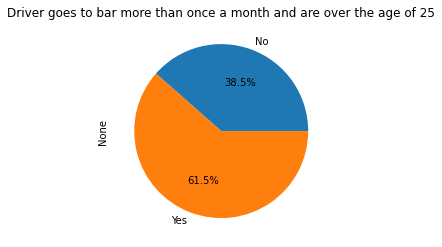

In [27]:
filtered_bar_visit_more_than_3Times=["1~3","4-8","gt8"]
filtered_age_more_than_25=["26","31","36","41","46","50plus"]
df_bar_age=data.query("Bar in @filtered_bar_visit_more_than_3Times & age in @filtered_age_more_than_25").groupby("coupon_accepted").size()/data.query("Bar in @filtered_bar_visit_more_than_3Times & age in @filtered_age_more_than_25")["coupon_accepted"].count()
df_bar_age.plot.pie(autopct="%1.1f%%",title="Driver goes to bar more than once a month and are over the age of 25", labels=["No", "Yes"])


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<AxesSubplot:title={'center':'drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or firestry'}, ylabel='None'>

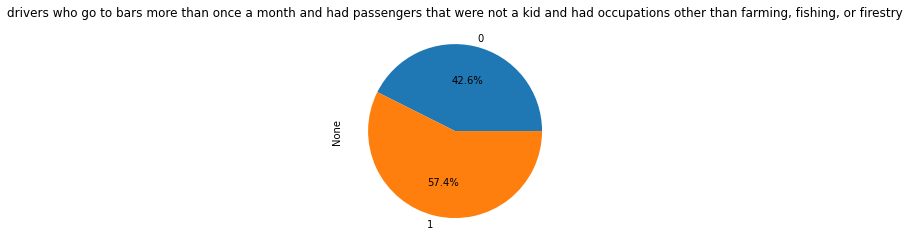

In [29]:
filtered_no_of_kids_passenger=["Kid(s)"]
filtered_occupuation=["Farming Fishing & Forestry"]
df_bar_occupation=data.query("passanger not in @filtered_no_of_kids_passenger & occupation not in @filtered_occupuation").groupby("coupon_accepted").size()/data.query("passanger not in @filtered_no_of_kids_passenger & occupation not in @filtered_occupuation")["coupon_accepted"].count()
df_bar_occupation.plot.pie(autopct="%1.1f%%",title="drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or firestry")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [32]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed 

<AxesSubplot:title={'center':'See the observations for multiple conditons'}, ylabel='None'>

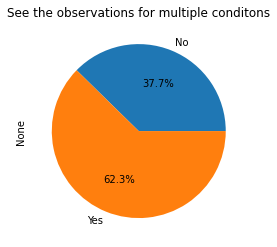

In [33]:
passengerFilter=["Kid(s)"]
maritalStatusFilter=["Widowed"]
visitTimeFilter=["1~3", "4~8","gt8"]
visitTimeMorethan4Times=["4~8","gt8"]
ageFilter=["below21","21"]
incomeFilter="$37500 - $49999"
filterText1="((passanger not in @filtered_no_of_kids_passenger & maritalStatus not in @maritalStatusFilter and Bar in @visitTimeFilter) or \
(Bar in @visitTimeFilter and  age in @ageFilter ) or \
(Bar in @visitTimeMorethan4Times & income in @incomeFilter))"

df_bar_multiple=data.query(filterText1).groupby("coupon_accepted").size()/data.query(filterText1)["coupon_accepted"].count()
df_bar_multiple.plot.pie(autopct="%1.1f%%",title="See the observations for multiple conditons", labels=["No", "Yes"])


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [34]:
#It is observed total of 56.8% chose to accept the coupon
#It is observed  maximum coupons accepted by users are Carry Out and Take Away. and least accepted is Bar coupons
#On a another findings highest coupon counts are under sunny weather. users go out and accept more coupons in sunny weather
#It is observed drivers goes to bar 4 to 8 times had accepted more coupons. drivers goes to more than once in a month have acceptenace chance of more than 60%

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  